In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

FileNotFoundError: [Errno 2] No such file or directory: './gpt-3.5-turbo-0301.csv'

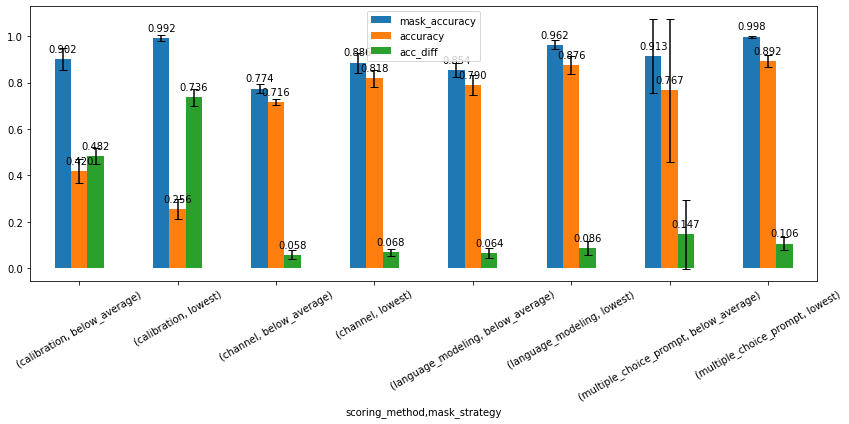

In [55]:
# measure mask accuracy and gap between mask accuracy and accuracy
poe_path = f"./process_of_elimination.csv"
poe_df = pd.read_csv(poe_path)
poe_df = poe_df.drop_duplicates()

n_shot = 0 # 3
# datasets="anli cqa siqa logical_deduction_five_objects disambiguation_qa conceptual_combinations strange_stories symbol_interpretation".split()
datasets=["cqa"]
poe_df = poe_df[(poe_df["n_shot"] == n_shot) & (poe_df["dataset"].isin(datasets))]


poe_df = poe_df.drop(columns=["seed", "model_family", "checkpoint", "method", "batch_size", "loading_precision", "sample", "prompting_method", "n_shot"])

# create a new colum that compute the difference between mask_accuracy and accuracy
poe_df["acc_diff"] = poe_df["mask_accuracy"] - poe_df["accuracy"]
poe_df.to_csv("poe_df.csv")
# sort poe_df by mask_strategy adn diff
# poe_df = poe_df.sort_values(by=['mask_accuracy', "acc_diff"], ascending=True)
# average accuracy over seed
# print(poe_df.head())
poe_df = poe_df.groupby(['scoring_method', 'mask_strategy'])
poe_mean = poe_df.mean()#.unstack()
poe_std = poe_df.std()#.unstack()
# plot bar
fig, ax = plt.subplots(figsize=(12, 6))
poe_mean.plot.bar(yerr=poe_std, ax=ax, capsize=4, rot=30)
# plot numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
# plt.savefig("mask.png", dpi=300, bbox_inches='tight')

In [79]:
# find the optimal masking strategy
poe_path = f"./process_of_elimination.csv"
poe_df = pd.read_csv(poe_path)
poe_df = poe_df.drop_duplicates()

n_shot = 0 
# for dataset in "anli cqa siqa logical_deduction_five_objects disambiguation_qa conceptual_combinations strange_stories symbol_interpretation".split():
for dataset in ['symbol_interpretation']:
    datasets=[dataset]
    data_df = poe_df[(poe_df["n_shot"] == n_shot) & (poe_df["dataset"].isin(datasets))]
    data_df = data_df.drop(columns=["seed", "model_family", "checkpoint", "method", "batch_size", "loading_precision", "sample", "prompting_method", "n_shot"])
    # create a new colum that compute the difference between mask_accuracy and accuracy
    data_df["acc_diff"] = data_df["mask_accuracy"] - data_df["accuracy"]
    data_df = data_df.groupby(['scoring_method', 'mask_strategy'])
    data_mean = data_df.mean()#.unstack()
    print(f"dataset: {dataset}")
    print(data_mean.sort_values(by=['accuracy'], ascending=False).iloc[:3])

dataset: symbol_interpretation
                                      mask_accuracy  accuracy  acc_diff
scoring_method         mask_strategy                                   
multiple_choice_prompt below_average          0.522     0.252     0.270
                       lowest                 0.840     0.235     0.605
channel                lowest                 0.830     0.230     0.600
